In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
os.chdir("C:/Users/kopyt/Desktop/kaggle")

os.getcwd()

'C:\\Users\\kopyt\\Desktop\\kaggle'

In [3]:
# read in data, overview

df = pd.read_csv("Breast_Cancer.csv")

display(df.head())
display(df.describe())
display(df.dtypes)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [4]:
# renaming columns, changing dtypes

df.rename(columns={'Age': 'age', 'Race': 'race', 'Marital Status': 'marital_status', 'T Stage ': 'T_stage', 
                   'N Stage': 'N_stage', '6th Stage': '6th_stage', 'A Stage': 'A_stage', 'Tumor Size': 'tumor_size',
                   'Estrogen Status': 'estrogen_status', 'Progesterone Status': 'progesterone_status',
                   'Grade': 'grade', 'Regional Node Examined': 'regional_node_examined',
                   'Reginol Node Positive': 'regional_node_positive', 'Survival Months': 'survival_months',
                   'Status': 'status'}, inplace=True)

# Specify columns to be converted to 'category' data type
columns_cat = ['race', 'marital_status', 'T_stage', 'N_stage', '6th_stage', 'differentiate', 'grade', 'A_stage',
               'estrogen_status', 'progesterone_status', 'status']

# Convert columns to 'category' data type
df[columns_cat] = df[columns_cat].astype('category')

# create new column "survival_years"
df["survival_years"] = df["survival_months"] / 12

# encode target ("status_encoded"), delete original
df["status_encoded"] = df["status"].replace({"Dead": 1, "Alive": 0})
df["status_encoded"] = df["status_encoded"].astype('uint8')
df = df.drop("status", axis=1)


# Display the updated df
display(df.head())
display(df.describe())
display(df.dtypes)

,age,race,marital_status,T_stage,N_stage,6th_stage,differentiate,grade,A_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,regional_node_positive,survival_months,survival_years,status_encoded
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,5.000000,0
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,5.166667,0
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,6.250000,0
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,7.000000,0
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,4.166667,0


,age,tumor_size,regional_node_examined,regional_node_positive,survival_months,survival_years,status_encoded
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962,5.941497,0.153082
std,8.963134,21.119696,8.099675,5.109331,22.921430,1.910119,0.360111
min,30.000000,1.000000,1.000000,1.000000,1.000000,0.083333,0.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000,4.666667,0.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000,6.083333,0.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000,7.500000,0.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000,8.916667,1.000000


age                          int64
race                      category
marital_status            category
T_stage                   category
N_stage                   category
6th_stage                 category
differentiate             category
grade                     category
A_stage                   category
tumor_size                   int64
estrogen_status           category
progesterone_status       category
regional_node_examined       int64
regional_node_positive       int64
survival_months              int64
survival_years             float64
status_encoded               uint8
dtype: object

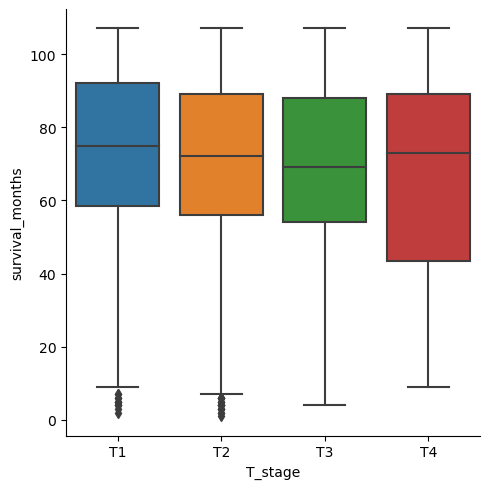

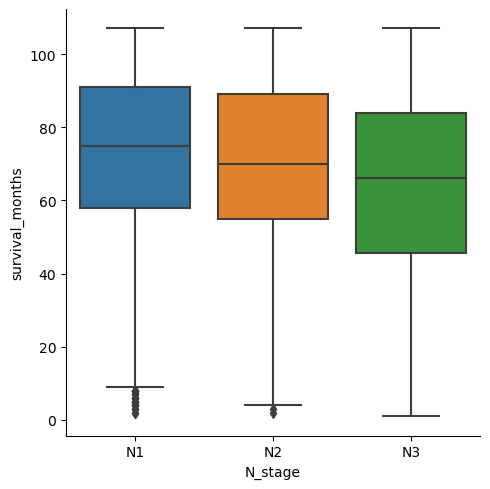

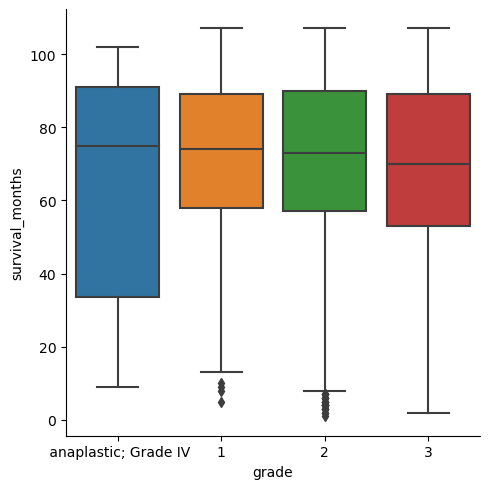

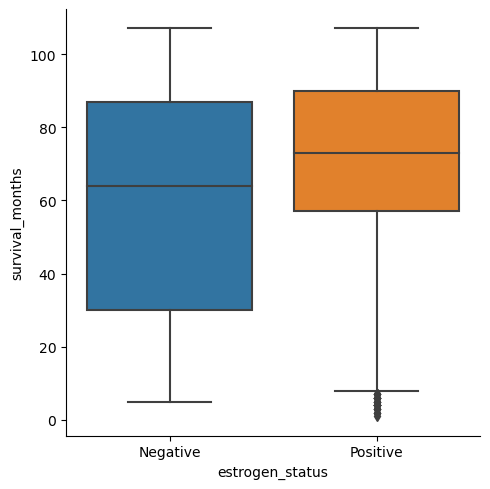

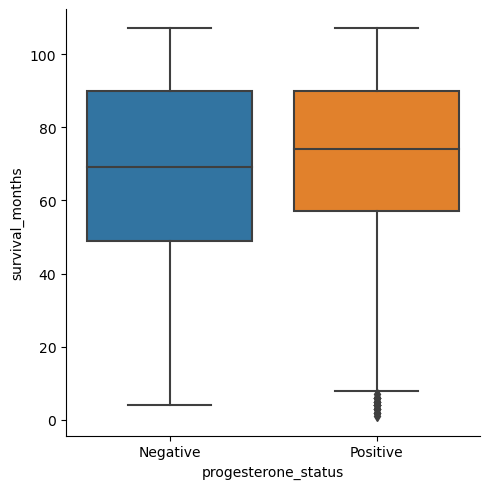

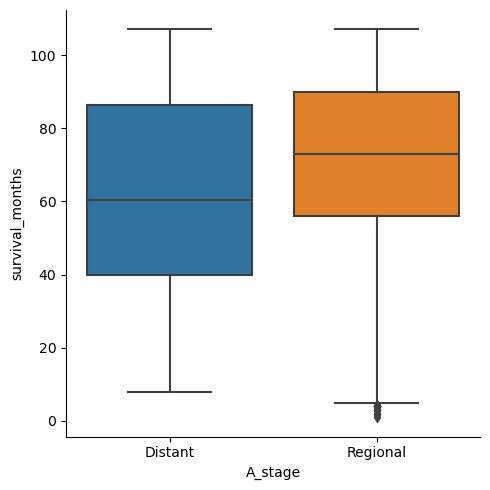

In [5]:
#plotting categorial data
sns.catplot(data=df, x="T_stage", y="survival_months", kind="box")
sns.catplot(data=df, x="N_stage", y="survival_months", kind="box")
sns.catplot(data=df, x="grade", y="survival_months", kind="box")


sns.catplot(data=df, x="estrogen_status", y="survival_months", kind="box")
sns.catplot(data=df, x="progesterone_status", y="survival_months", kind="box")
sns.catplot(data=df, x="A_stage", y="survival_months", kind="box")

plt.tight_layout()

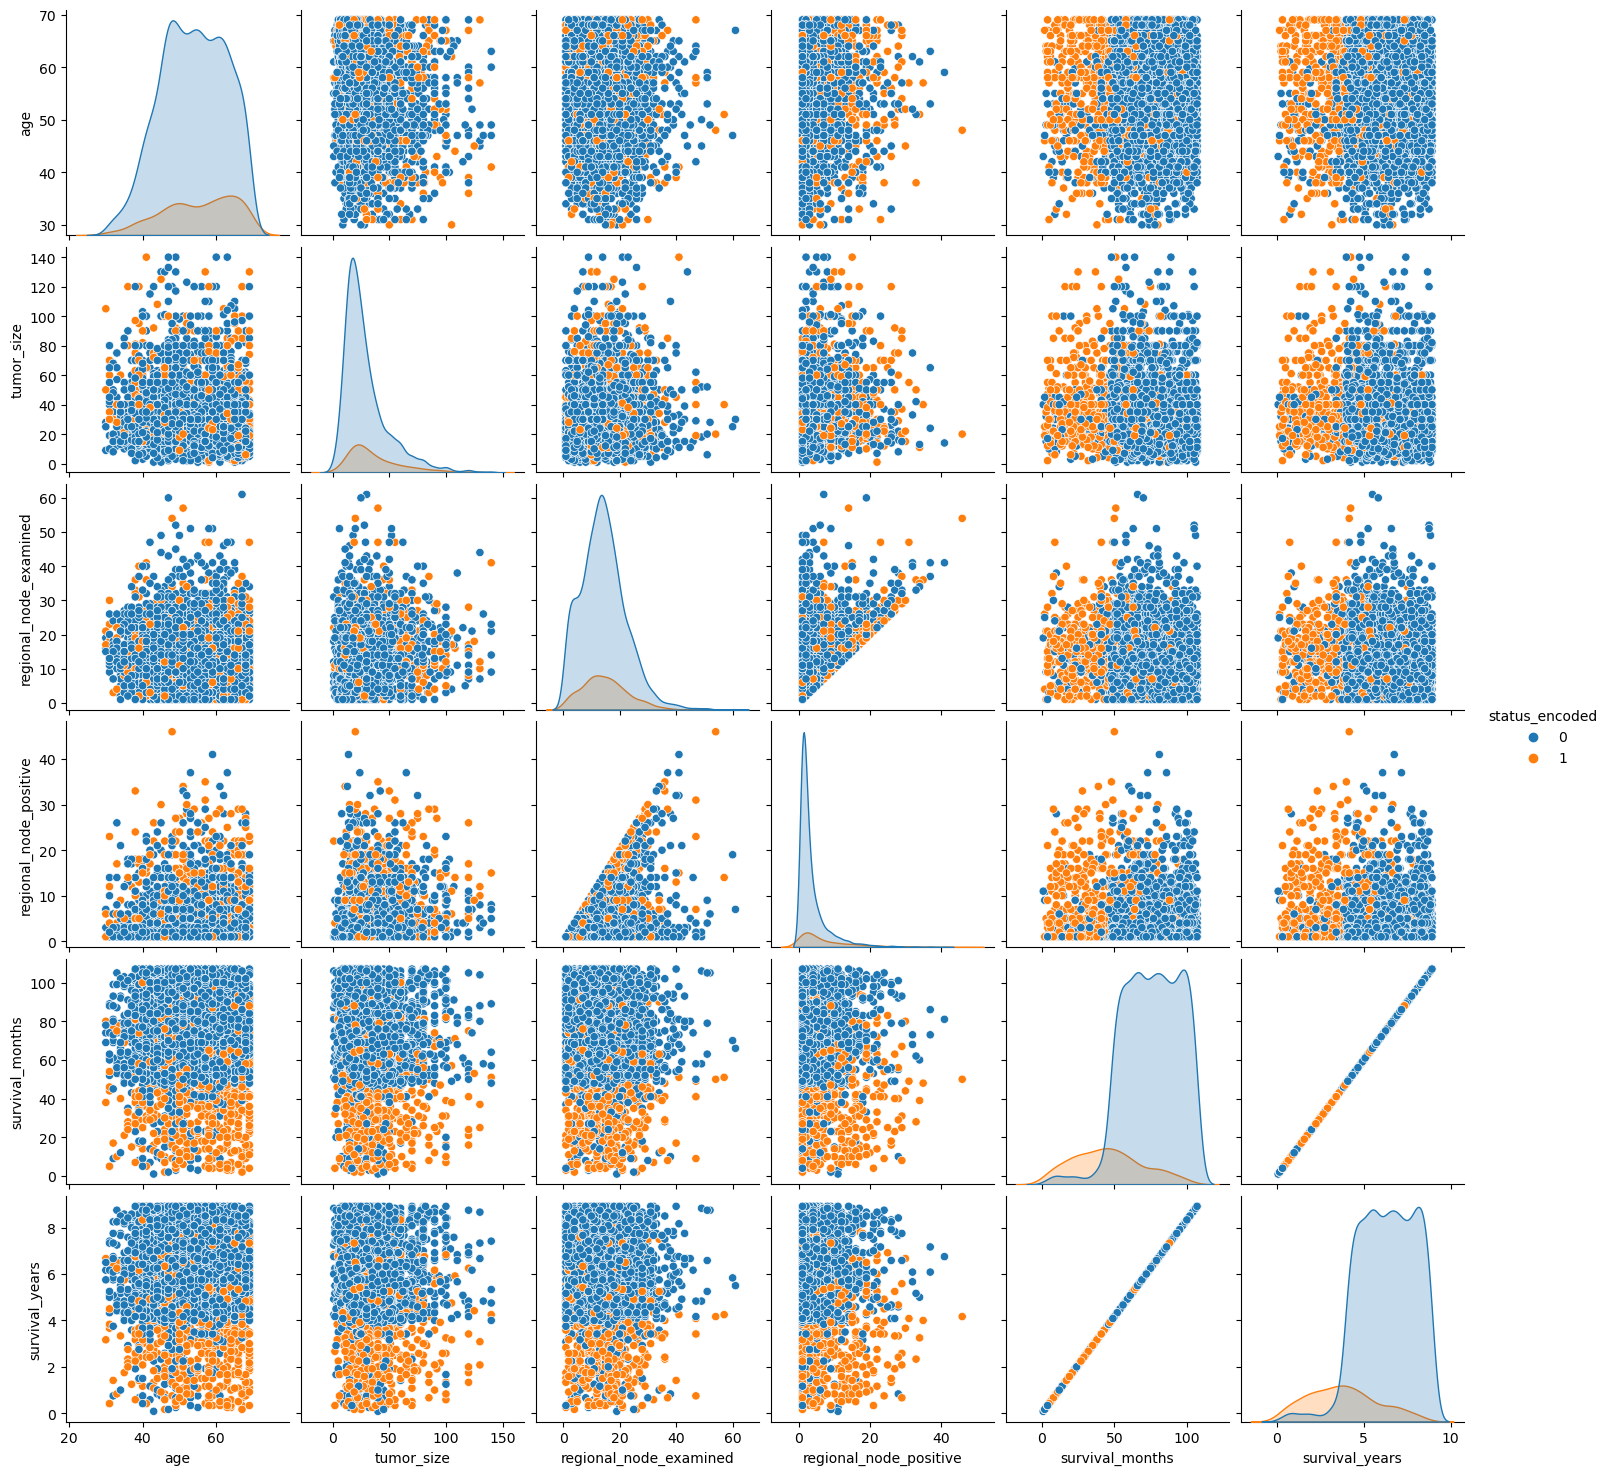

In [6]:
#sns.pairplot(df, hue="status_encoded")

C:\Users\kopyt\AppData\Local\Temp\ipykernel_13804\2226130887.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


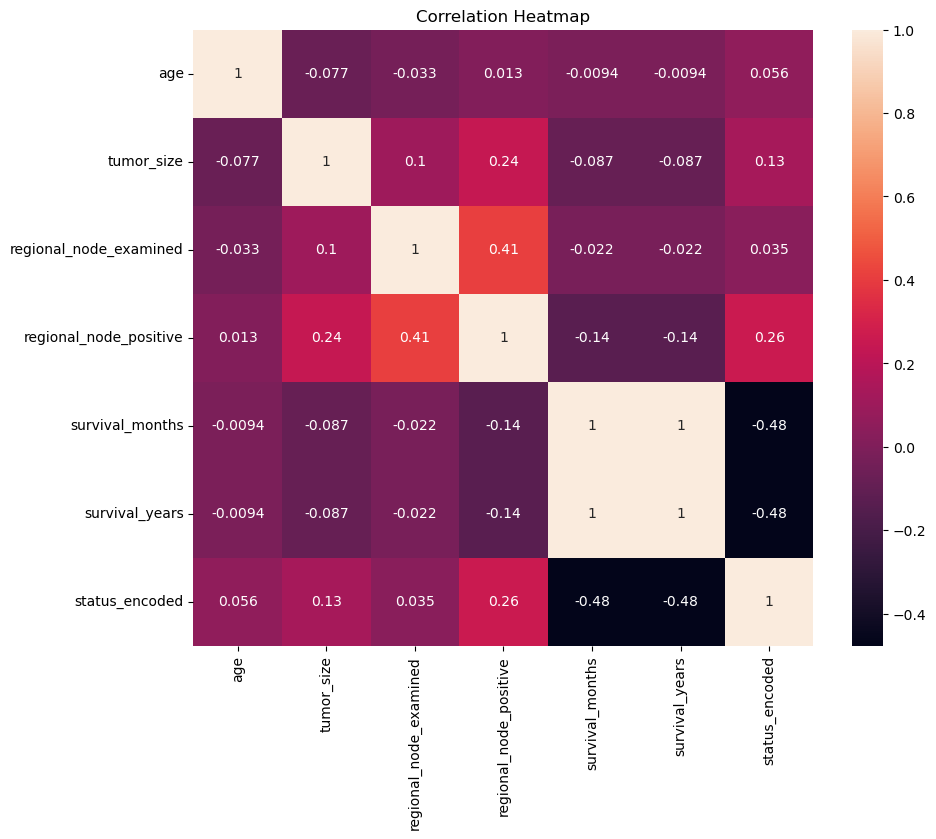

In [7]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# train-test-split

features = df.iloc[:, :-1]
target = df.iloc[:, -1]

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=42)

In [9]:
#baseline modelfrom sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# select cat columns
categorical_columns = features_train.select_dtypes(include=["category"]).columns.tolist()

# build pipeline with scaler, encoder, logreg
pipeline = Pipeline([('preprocessor', ColumnTransformer([
                    ('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))])
# use label encoding


pipeline.fit(features_train, target_train)

# Predict on the testing data
target_pred = pipeline.predict(features_test)

In [10]:
# report
report = classification_report(target_test, target_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       333
           1       0.50      0.84      0.63        70

    accuracy                           0.83       403
   macro avg       0.73      0.83      0.76       403
weighted avg       0.88      0.83      0.84       403



In [11]:
# feature importances

feature_importances = pipeline.named_steps['classifier'].coef_[0]
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

print("\nTop 10 Feature Importances:\n", importance_df)


Top 10 Feature Importances:
                                          Feature  Importance
37             remainder__regional_node_positive    0.439970
34                                remainder__age    0.227275
11                           encoder__T_stage_T4    0.186057
16                        encoder__6th_stage_IIB    0.157490
10                           encoder__T_stage_T3    0.150250
13                           encoder__N_stage_N2    0.145134
5              encoder__marital_status_Separated    0.106055
27                              encoder__grade_3    0.094468
21  encoder__differentiate_Poorly differentiated    0.094468
0                            encoder__race_Black    0.090096


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'preprocessor__encoder__drop': [None, 'first'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['liblinear', 'lbfgs'],
    'classifier__max_iter': [100, 200, 300]}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1')

# Fit the grid search to find the best parameters
grid_search.fit(features_train, target_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Predict on the testing data using the best estimator
best_estimator = grid_search.best_estimator_
target_pred = best_estimator.predict(features_test)

Best Parameters: {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'preprocessor__encoder__drop': 'first'}
Best Score: 0.534841997181953
